# Tiara Airline Passanger Satisfaction

## Latar Belakang

Sebuah perusahaan maskapai penerbangan, ingin mengetahui faktor-faktor apa saja yang dapat mempengaruhi kepuasan dalam pelayanan maskapai penerbangan. Informasi ini akan membantu perusahaan untuk melakukan penelitian lebih lanjut tentang **survei kepuasan pelanggan terhadap pelayanan maskapai penerbangan**. Hasil dari analisis yang dilakukan dapat menjadi sebuah  kesimpulan dalam membuat keputusan, langkah apa yang perlu dilakukan bagi maskapai penerbangan untuk dapat meningkatkan kepuasan pelayanan untuk konsumen.

## Rumusan Permasalahan

Berdasarkan latar belakang yang telah dijabarkan, maka perumusan masalah dapat kita jabarkan sebagai berikut :
1. Apakah penumpang merasa puas dengan pelayanan yang diberikan oleh maskapai penerbangan?
2. Bagaimana cara meningkatkan kualitas pelayanan maskapai penerbangan?

## Data
Untuk menjawab pertanyaan diatas, maka kita dapat melakukan analisa data **Airline Passanger Satisfaction** hasil dari survei yang sudah dilakukan oleh perusahaan maskapai penerbangan.  
Dataset dapat di akses [disini](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).

### Daftar Variable Dataset
- **ID** : Nomor unik penumpang  
- **Gender** : Jenis kelamin penumpang `(Male/Female)`  
- **Customer Type** : Tipe penumpang `(Loyal Customer/Disoyal Customer)`  
- **Age** : Usia penumpang 
- **Type of Travel** : Tujuan penerbangan penumpang `(Personal Travel/Bussiness Travel)`  
- **Class** : Kelas perjalanan penumpang `(Bussiness/Eco/Eco Plus)`  
- **Flight Distance** : Jarak penerbangan  
- **Inflight wifi service** : Tingkat kepuasan terhadap layanan wifi dalam pesawat `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`  
- **Departure/Arrival time convenient** : Tingkat kepuasan terhadap waktu keberangkatan/kedatangan `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`  
- **Inflight entertainment** : Tingkat kepuasan terhadap hiburan dalam pesawat `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`    
- **On-board service** : Tingkat kepuasan terhadap pelayanan dalam pesawat `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`    
- **Leg room service** : Tingkat kepuasan terhadap jarak antara kursi dan ruang kaki `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`    
- **Baggage handling** : Tingkat kepuasan terhadap penanganan bagasi `(1=sangat tidak puas, 5=sangat puas)`    
- **Checking service** : Tingkat kepuasan terhadap pelayanan check-in `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`    
- **Inflight service** : Tingkat kepuasan terhadap pelayanan dalam pesawat `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`    
- **Cleanliness** : Tingkat kepuasan terhadap kebersihan `(0=tidak berlaku, 1=sangat tidak puas, 5=sangat puas)`   
- **Departure Delay in Minutes** : Menit keterlambatan keberangkatan    
- **Arrival Delay in Minutes** : Menit keterlambatan kedatangan  
- **satisfaction** : Tingkat kepuasan maskapai penerbangan `(Satisfaction/Neutral or Dissatisfaction)`

### Data Preparation

Untuk melakukan persiapan data, kita perlu melakukan import library yang dibutuhkan dan menyiapkan dataset yang ingin kita lakukan analisa.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Selanjutnya kita perlu melakukan import dataset yang ingin akan kita analisa. Berikut adalah dataset dari **Tiara Airline Passanger Satisfaction**.

In [2]:
df = pd.read_csv('airline passanger satisfaction.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Data Understanding & Data Cleaning
Pada tahapan ini, kita perlu mengenal dataset yang akan kita analisa. Di proses ini, kita perlu mengetahui apakah ada missing value atau apakah ditemukan data anomali pada dataset tersebut. Apabila ditemukan anomali, maka perlu dilakukan data cleaning dan di justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

####  Cek Data Format

In [3]:
print('Pada data frame terdapat', df.shape[0],'baris dan', df.shape[1],'kolom.')
# .shape => menampilkan jumlah data berupa baris dan kolom

Pada data frame terdapat 103904 baris dan 25 kolom.


In [6]:
df = df.rename(columns={'id':'ID','satisfaction':'Satisfaction'}) 
# .rename => mengubah variable "satisfaction" menjadi "Satisfaction"

df = df.drop(columns=['Unnamed: 0']) 
# .drop => menghapus kolom "unnamed:0", karena penomorannya sama dengan penomoran terhadap index

display(df.head(), df.tail())
# Menampilkan 5 data teratas (.head) dan 5 data terbawah (.tail)

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [7]:
df.to_csv('Tiara Airline Passanger Satisfaction.csv')

#### Cek Missing Value

In [8]:
df.isna().sum()

ID                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Satisfaction                           0
dtype: int64

**Missing value** adalah nilai yang tidak terdeteksi pada dataset. Bisa berupa blank cell atau simbol tertentu seperti NaN (Not a Number) atau NA (Not Available). Missing value perlu diatasi karena dapat menjadi masalah dalam melakukan analisis data, sehingga dapat mempengaruhi hasil analisis.  

**Dari hasil diatas terdapat missing value pada kolom `Arrival Delay in Minutes`**, maka dari itu perlu kita lakukan fillna pada kolom tersebut dengan median dari variable itu sendiri.

<AxesSubplot:>

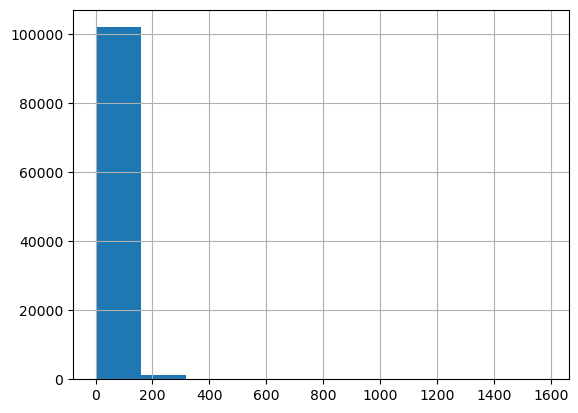

In [9]:
df['Arrival Delay in Minutes'].hist()

Pada tampilan histogram diatas, dapat kita lihat bahwa histogram tersebut menunjukkan **positive skewness** artinya nilai mean dan nilai median lebih besar daripada nilai modus.

In [10]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'].median())
# .fillna => mengisi missing value dengan median dari varible itu sendiri

In [11]:
df.isna().sum()

ID                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64

#### Cek Data Tipe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [13]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
# .astype => mengubah data tipe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ID                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Type of Travel                     103904 non-null  object
 5   Class                              103904 non-null  object
 6   Flight Distance                    103904 non-null  int64 
 7   Inflight wifi service              103904 non-null  int64 
 8   Departure/Arrival time convenient  103904 non-null  int64 
 9   Ease of Online booking             103904 non-null  int64 
 10  Gate location                      103904 non-null  int64 
 11  Food and drink                     103904 non-null  

#### Cek Data Duplikat

In [15]:
df.duplicated().sum()

0

Pada dataset ini kita tidak menemukan adanya data duplikat pada data penumpang maskapai. Hal ini perlu dilakukan untuk memastikan bahwa semua penumpang telah mengisi survei sebanyak 1 kali pada setiap akun, guna menghindari kesalahan pada hasil kesimpulan dalam analisa.

#### Statistik Deskriptif

In [16]:
display(df.describe(), df.describe(include='object'))
# .describe => menampilkan ringkasan statistik deskriptif dari tiap kolom untuk data numerik seperti count, mean, standard deviation, minimum, maximum dan quartile

,ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


### Data Unik

In [17]:
pd.set_option('display.max_colwidth', -1) 
# display.max_colwidth => mengatur lebar maksimal dari kolom
# Nilai -1 artinya tanpa dibatasi

listitem = []
for col in df.columns :
    listitem.append( [col, df[col].nunique(), df[col].unique()]) #menambah index baru ke listitem

tabel = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], 
                     data = listitem)
tabel

,Column Name,Number of Unique,Unique Sample
0,ID,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


### Data Clean

Pada tahap ini, dataset yang kita punya sudah bersih dari missing value dan data anomali.

In [18]:
listitem = []
for columns in df.columns :
    listitem.append([columns, df[columns].dtype, df[columns].isna().sum(),
                    df[columns].nunique(), list(df[columns].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data = listitem)
print(df.shape)
dfDesc

(103904, 24)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,103904,"[103606, 104207]"
1,Gender,object,0,2,"[Male, Female]"
2,Customer Type,object,0,2,"[Loyal Customer, disloyal Customer]"
3,Age,int64,0,75,"[11, 12]"
4,Type of Travel,object,0,2,"[Business travel, Personal Travel]"
5,Class,object,0,3,"[Eco, Eco Plus]"
6,Flight Distance,int64,0,3802,"[3871, 3840]"
7,Inflight wifi service,int64,0,6,"[5, 0]"
8,Departure/Arrival time convenient,int64,0,6,"[0, 2]"
9,Ease of Online booking,int64,0,6,"[4, 1]"


Dari proses pengenalan dan pembersihan data, dapat disimpulkan bahwa :  
* Dataset **Tiara Airline Passanger Satisfaction** terdapat 25 kolom dan 103.904 baris.
* Terdapat missing value pada `Arrival Delay in Minutes` sebanyak 310 data, namun dapat diatasi dengan mengisi pada data yang hilang dengan median dari variabel itu sendiri.
* Untuk data duplikat, tidak ditemukan data yang sama(duplikat) pada data penumpang maskapai penerbangan.
* Untuk data unik, dapat disimpulkan bahwa tidak ada duplikat ID/data. Kolom `Unnamed : 0` dan `id` dihapus karena tidak relevan untuk analisa.
* Selain itu, tidak ditemukan data dengan format penulisan yang salah. 
* Untuk nilai *rating* yang telah ditetapkan memiliki skala dari 1 yang artinya buruk hingga skala 5 yang artinya sangat baik. Namum dapat dilihat bahwa beberapa kategori memiliki nilai 0, dimana nilai 0 tidak termasuk range rating sehingga diasumsikan responden tidak mengisi kolom. 
* Khusus untuk `Baggage_Handling` tidak terdapat nilai 0, sehingga diketahui bahwa penanganan bagasi merupakan salah satu hal yang paling diperhatikan.
* Pada kolom `Satisfaction` penumpang yang memberi survey dengan kategori *neutral or dissatisfied* dapat digabung menjadi satu kategori. Namun untuk analisa survey selanjutnya disarankan untuk kategori *neutral or dissatisfied* dapat dipisah karena bisa menghasilkan bias pada analisa.
* Tidak ditemukan harga tiket, tanggal keberangkatan ataupun lokasi keberangkatan pada dataset ini yang dapat kita analisa dan dapat menjadi faktor kepuasan pelanggan.

# Data Analysis

Setelah melakukan pengenalan data dan pembersihan pada dataset, tahap selanjutnya yaitu analisa data. Pada tahapan ini kita akan melakukan analisa faktor-faktor apa saja yang dapat mempengaruhi kepuasan pelayanan terhadap penumpang maskapai penerbangan dan dapat memberikan rekomendasi apa saja yang dapat dilakukan guna meningkatkan kualitas dalam pelayanan.

## Berdasarkan Kepuasan Penumpang

Maskapai penerbangan telah mengumpulkan survei kepuasan pelayanan terhadap penumpang maskapai penerbangan yang dapat menjadi tolak ukur dalam menentukan seberapa baik pelayanan maskapai penerbangan terhadap penumpang, akankah dapat memenuhi harapan penumpang atau tidak.  

Jika dalam pelayanan maskapai penerbangan dapat memenuhi harapan penumpang maka maskapai tersebut dapat mempertahankan pelayanannya. Namun jika ditemukan feedback bahwa pelayanan maskapai belum memenuhi harapan penumpang, maka perlu dilakukan peningkatan pelayanan  dan melakukan prediksi tentang perkembangan bisnis.

Dari dataset ini, hasil survei tentang kepuasan pelayanan penumpang dibagi menjadi 2 kategori, yaitu `satisfied`, `neutral`, dan `dissatisfied`. Berikut adalah analisa perbandingan kepuasan penumpang maskapai penerbangan.

In [19]:
df['Satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: Satisfaction, dtype: int64

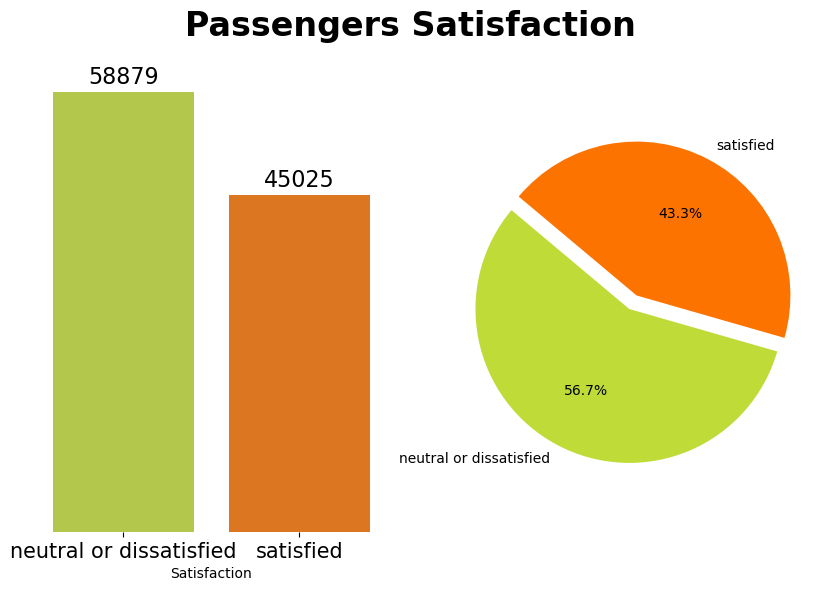

In [31]:
# Membuat canvas
fig=plt.figure(figsize=(10,6))
plt.suptitle('Passengers Satisfaction', weight='bold',fontsize=24)
grid=gridspec.GridSpec(nrows=1,ncols=2,figure=fig)

# Subplot1 : Bar Chart
ax1=fig.add_subplot(grid[0,0])
sns.countplot(x='Satisfaction', data=df, ax=ax1, palette=['#bfdb38','#fc7300'])

# Remove the border of the plot
for spine in ax1.spines.values():
    spine.set_visible(False)
    
# Dissapera yaxis
ax1.get_yaxis().set_visible(False)

for index, value in enumerate(df['Satisfaction'].value_counts()):
    ax1.annotate(value, xy=(index, value+2000), ha='center', va='center', fontsize=16)

ax1.set_xticklabels(df['Satisfaction'].value_counts().index, fontsize=15)    

# Subplot2 : Pie Chart
ax2=fig.add_subplot(grid[0,1])
label=list(df['Satisfaction'].value_counts().index)
value=list(df['Satisfaction'].value_counts().values)
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#bfdb38','#fc7300'])
ax2.axis('equal')

plt.show()

Dibuktikan pada grafik diatas, perbandingan hasil survey antara penumpang maskapai Tiara Airlines yang merasa `satistied` sebanyak 45.025 penumpang dan penumpang maskapai Tiara Airlines yang merasa `neutral or dissatisfied` sebanyak 58.879 penumpang.

Dapat kita simpulkan bahwa sebanyak **58.879 atau 56,7%** penumpang merasa **netral atau bahkan tidak puas** dengan pelayanan yang diberikan oleh maskapai Tiara Airlines. Pihak internal maskapai penerbangan perlu melakukan penelitian lebih lanjut tentang hal ini, karena dapat mempengaruhi personal branding perusahaan yang kurang baik.

## Berdasarkan Profil Penumpang

In [21]:
display(pd.crosstab(df['Gender'],df['Satisfaction'],normalize='index'), pd.crosstab(df['Class'],df['Satisfaction'],normalize='index'), pd.crosstab(df['Customer Type'],df['Satisfaction'],normalize='index'), pd.crosstab(df['Type of Travel'],df['Satisfaction'],normalize='index'))

Satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,0.572629,0.427371
Male,0.560525,0.439475


Satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,0.305749,0.694251
Eco,0.813862,0.186138
Eco Plus,0.753936,0.246064


Satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,0.522709,0.477291
disloyal Customer,0.763342,0.236658


Satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,0.417403,0.582597
Personal Travel,0.898322,0.101678


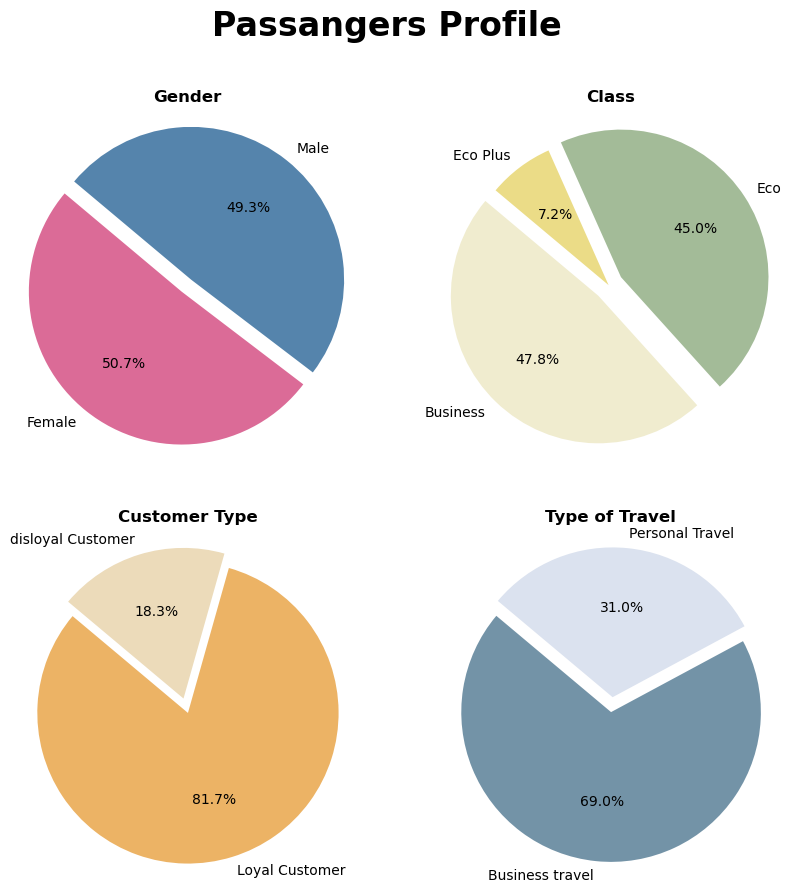

In [30]:
# Membuat canvas
fig=plt.figure(figsize=(10,10))
plt.suptitle('Passangers Profile', weight='bold',fontsize=24)
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)

## Subplot : Gender
ax1=fig.add_subplot(grid[0,0])
ax1.set_title('Gender', weight='bold')

label=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)

# Pie Chart
ax1.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#db6b97','#5584ac'])
ax1.axis('equal')

## Subplot : Customer Type
ax2=fig.add_subplot(grid[1,0])
ax2.set_title('Customer Type', weight='bold')

label=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)

# Pie Chart
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#ecb365','#ecdbba'])
ax2.axis('equal')

## Subplot : Class
ax3=fig.add_subplot(grid[0,1])
ax3.set_title('Class', weight='bold')

label=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)

# Pie Chart
ax3.pie(value, labels=label, autopct='%1.1f%%', explode=(0.1,0.1,0,), startangle=140, colors=['#f0eccf','#a3bb98','#ebdc87'])
ax3.axis('equal')

## Subplot : Type of Travel
ax4=fig.add_subplot(grid[1,1])
ax4.set_title('Type of Travel', weight='bold')

label=list(df['Type of Travel'].value_counts().index)
value=list(df['Type of Travel'].value_counts().values)

# Pie Chart
ax4.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=140, colors=['#7393a7','#dbe2ef'])
ax4.axis('equal')

plt.show()

Dari hasil analisa diatas, dapat disimpulkan bahwa :
- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Gender` tidak memiliki perbedaan yang signifikan. Sebanyak 50.7% penumpang *Female* merasa puas dibandingkan dengan penumpang *Male* yang merasa tidak puas dengan pelayanan yang diberikan oleh maskapai penerbangan.


- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Class` memiliki perbedaan yang cenderung signifikan. Perbandingan antara penumpang yang memilih kelas *Business* yaitu sebanyak 47.8% dan penumpang yang memilih kelas *Eco* yaitu sebanyak 45.0%, sedangkan penumpang yang memilih kelas *Eco Plus* hanya sebanyak 7.2%. Hal ini menunjukkan peminat pesawat kelas *Business* dan kelas *Eco* lebih banyak daripada kelas *Eco Plus*.


- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Customer Type` memiliki perbedaan yang cenderung signifikan. Dilihat dari perbandingan diatas, penumpang yang *Loyal Customer* dan *Disloyal Customer* yaitu sebanyak 81.7% dan 18.3%, artinya penumpang yang setia dan selalu menggunakan jasa maskapai penerbangan lebih banyak.


- Kepuasan pelayanan berdasarkan profil penumpang terhadap `Type of Travel` memiliki perbedaan yang signifikan. Dimana 69% penumpang yang menggunakan jasa penerbangan Tiara Airlines merupakan kategori *Business Travel* lebih banyak dibandingkan dengan 31% adalah penumpang dengan kategori *Personal Travel*.

## Berdasarkan Usia Penumpang

In [23]:
pd.crosstab(df['Age'],df['Satisfaction'],normalize='index').sum()

Satisfaction
neutral or dissatisfied    47.9018
satisfied                  27.0982
dtype: float64

<AxesSubplot:title={'center':'Satisfaction Base on Age'}, xlabel='Age', ylabel='Density'>

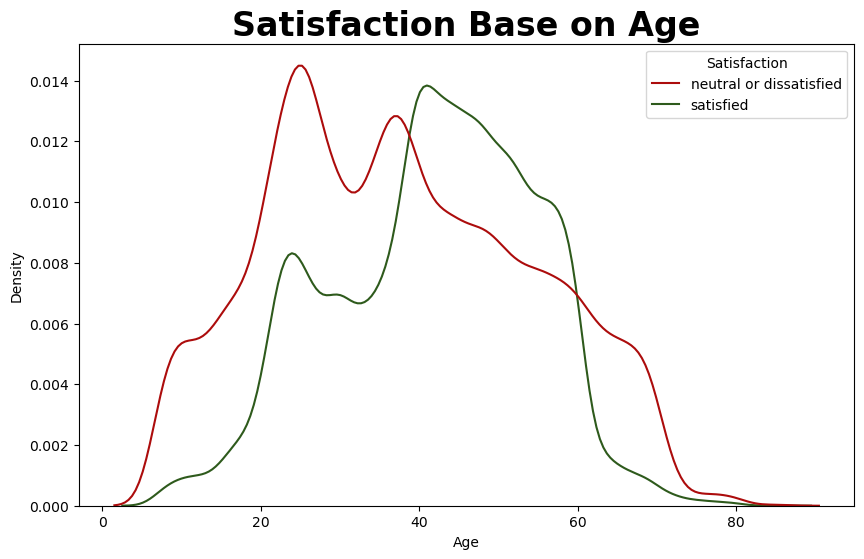

In [34]:
plt.figure(figsize=(10,6))
plt.title('Satisfaction Base on Age', weight='bold', fontsize=24)
sns.kdeplot(data=df,x='Age',hue='Satisfaction', palette=['#ac0c0c','#2e5a1c'])

Dari grafik diatas, dapat disimpulkan bahwa distribusi tidak normal. Penumpang yang menjawab puas terhadap pelayanan maskapai berkisaran usia 40-55 tahun. Sedangkan penumpang yang menjawab survei tidak puas terhadap pelayanan maskapai berkisaran usia 20-30 tahun.

## Korelasi Berdasarkan Rating Survey

In [32]:
df.corr('spearman')

,ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
ID,1.000000,0.025727,0.133474,-0.022580,-0.003084,-0.001006,-0.000574,0.055773,0.054393,0.001605,0.051869,0.041884,0.070436,0.074618,0.074150,0.022706,0.056776,-0.004436
Age,0.025727,1.000000,0.072321,0.016518,0.036161,-0.002103,0.020841,0.215725,0.161383,0.081574,0.070441,0.051864,-0.026338,0.039724,-0.031062,0.053716,-0.010894,-0.012384
Flight Distance,0.133474,0.072321,1.000000,0.006456,-0.013443,0.000750,0.046593,0.194100,0.137140,0.105091,0.099600,0.118062,0.060355,0.071707,0.059940,0.080697,0.026570,-0.001704
Inflight wifi service,-0.022580,0.016518,0.006456,1.000000,0.338860,0.332789,0.132695,0.435733,0.118909,0.199700,0.116584,0.149572,0.113337,0.042710,0.105462,0.130628,-0.030202,-0.036828
Departure/Arrival time convenient,-0.003084,0.036161,-0.013443,0.338860,1.000000,0.450214,0.002934,0.061735,0.011934,-0.009296,0.071701,0.007048,0.088548,0.099762,0.090800,0.013951,-0.002986,-0.005665
Gate location,-0.001006,-0.002103,0.000750,0.332789,0.450214,1.000000,-0.001142,-0.001374,0.001735,0.003030,-0.027975,-0.005588,-0.006472,-0.035812,-0.007133,-0.003750,0.004324,0.005465
Food and drink,-0.000574,0.020841,0.046593,0.132695,0.002934,-0.001142,1.000000,0.241274,0.557754,0.610246,0.058136,0.031457,0.045529,0.083811,0.043877,0.647056,-0.021389,-0.032856
Online boarding,0.055773,0.215725,0.194100,0.435733,0.061735,-0.001374,0.241274,1.000000,0.440087,0.302319,0.175737,0.139163,0.118017,0.217763,0.108950,0.345629,-0.033044,-0.049567
Seat comfort,0.054393,0.161383,0.137140,0.118909,0.011934,0.001735,0.557754,0.440087,1.000000,0.603980,0.147481,0.119710,0.104604,0.199209,0.098379,0.667196,-0.020337,-0.036795
Inflight entertainment,0.001605,0.081574,0.105091,0.199700,-0.009296,0.003030,0.610246,0.302319,0.603980,1.000000,0.436907,0.314101,0.395773,0.121436,0.422208,0.680506,-0.027402,-0.044025


<AxesSubplot:>

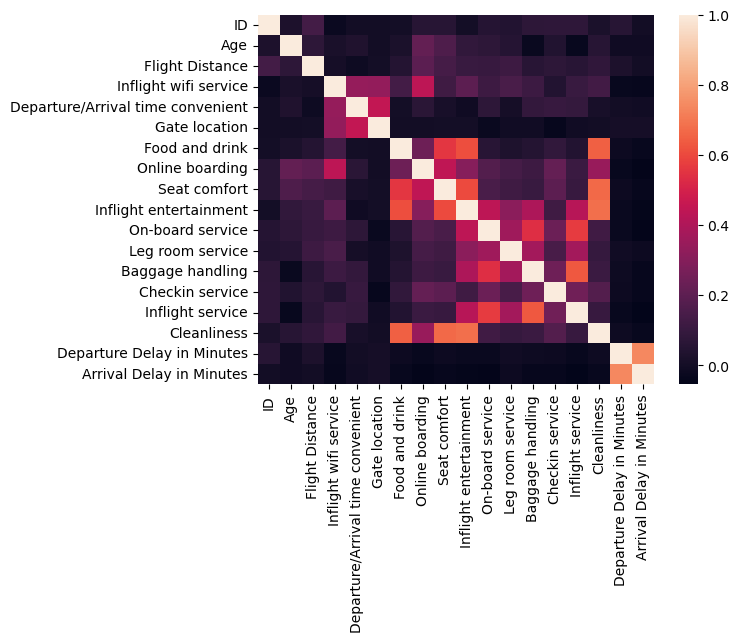

In [33]:
sns.heatmap(df.corr('spearman'))

Dari heatmap diatas, dapat dibuktikan bahwa ada beberapa variabel yang memiliki korelasi yang cukup tinggi. Hal ini diakibatkan karena penilaian yang saling terkeikatan. Misalnya, orang memilih nilai rendah untuk kemudahan online booking dan memberikan nilai rendah pada wifi dalam penerbangan. Contoh lainnya yaitu penilaian terhadap makanan, minuman dan kebersihan bisa dikatakan cukup.

# Kesimpulan & Rekomendasi
Setelah melakukan analisa diatas kita dapat membuat kesimpulan dan rekomendasi untuk meningkatkan pelayanan **maskapai penerbangan Tiara Airlines**.

### Kesimpulan
Dari hasil analisa secara keseluruhan, dapat kita simpulkan bahwa :
- Hasil analisa dari survey menunjukkan bahwa penumpang memiliki kecenderungan merasa `netral atau tidak puas` terhadap pelayanan yang diberikan oleh maskapai penerbangan, dengan presentase 56.7%
- Dari 103.904 data survey, terdapat 50.7% yang `gender` female merasa puas dengan pelayanan yang diberikan oleh maskapai penerbangan
- Sebanyak 69.4% penumpang memilih kelas `bisnis` cenderung merasa lebih puas dengan pelayanan yang diberikan oleh maskapai penerbangan. Karena semakin jauh waktu tempuh/perjalanan penumpang, maka penumpang akan merasa lebih nyaman dengan fasilitas yang ada pada kelas bisnis.
- Penumpang dengan tujuan `personal travel` cenderung merasa tidak puas dengan pelayanan yang diberikan oleh maskapai penerbangan, dibandingkan dengan penumpang yang bertujuan untuk `bisnis travel`. Hal ini disebabkan karena tujuan personal travel lebih banyak meilih kelas ekonomi, dengan presentase 31%
- Penumpang yang merasa puas dengan pelayanan yang diberikan oleh maskapai memiliki rentang usia antara 40-55 tahun, sedangkan penumpang yang merasa netral atau tidak puasdengan pelayanan yang diberikan oleh maskapai memiliki rentang usia antara 20-30 tahun.

### Rekomendasi
-  Berdasarkan hasil penelitian ini, maka kami menyarankan bahwa hendaknya maskapai penerbangan Tiara Airlines agar memperhatikan harga dan  kualitas pelayanan dalam rangka meningkatkan kepuasan pelanggan. Sehingga jasa yang  ditawarkan  oleh Tiara Airlines akan lebih  kompetitif demi merebut porsi pasar yang lebih besar dalam kategori maskapai berbasis full service bagi Tiara Airlines.


- Untuk mencapai kepuasan pelanggan, tentu pihak Maskapai Tiara Airlines harus lebih meningkatkan kualitas pelayanan kepada konsumen, terutama pada kategori usia  millenial. Pelayanan dan harga yang sesuai dengan pelanggan dalam kategori ini  dirasa  akan lebih  mendorong  pelanggan  ini  menjadi  loyal,  sekaligus menjadi media promosi bagi Tiara Airlines. Dampaknya adalah Tiara Airlines dapat merebut kaum milenial dan pelanggan baru untuk memilih terbang bersama Tiara Airlines dan mempertahankan pelanggan yang lama. Pihak Maskapai Penerbangan Tiara Airlines juga dapat meningkatkan kegiatan pemasaran  lainnya  seperti  promosi  yang  berkelanjutan  melalui  media  sosial  agar  konsumen  lebih mengetahui jasa yang akan diberikan.


Dengan mengetahui faktor apa saja yang dapat mempengaruhi kepuasan penumpang, diharapkan analisa ini dapat membantu hal tersebut dalam meningkatkan kualitas pelayanan Maskapai Tiara Airlines.